In [2]:
import h5py
hf = h5py.File('Galaxy10_DECals.h5', 'r')

In [8]:
len(hf['ans'])

17736

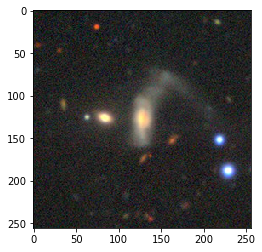

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
plt.imshow(hf['images'][0], interpolation='nearest')
plt.show()

In [4]:
hf['pxscale'][108]

0.262

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

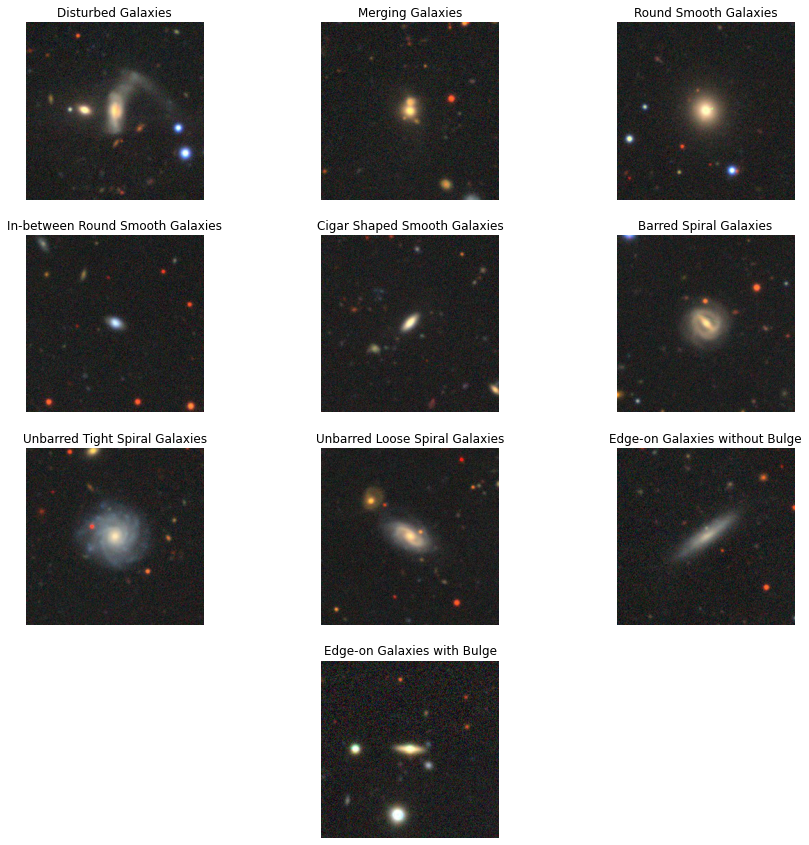

In [6]:
j = 0
a=0
class_labels = ['Disturbed Galaxies','Merging Galaxies','Round Smooth Galaxies','In-between Round Smooth Galaxies','Cigar Shaped Smooth Galaxies','Barred Spiral Galaxies','Unbarred Tight Spiral Galaxies','Unbarred Loose Spiral Galaxies','Edge-on Galaxies without Bulge','Edge-on Galaxies with Bulge']
plt.figure(figsize=(15,15))
for index, i in enumerate(hf['ans']):
    a = j
    if hf['ans'][index] == a:
        if(a==9):
            a=10
        plt.subplot(4,3,a+1)
        plt.imshow(hf['images'][index])
        title = "{class1}".format(class1=class_labels[j])
        plt.title(title)
        plt.axis('off')
        j = j + 1

plt.show()

  

In [7]:
hf['images'][0].shape

(256, 256, 3)

In [8]:
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (256,256)
CROP_SIZE = (256,256)
IMG_SHAPE = (256,256)
    
def get_all_images(hf, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    y_batch = []
    x_batch = []
    for i in tqdm(range(len(hf['images']))):
        x = resize(hf['images'][i],IMG_SHAPE)
        y = hf['ans'][i]
        x_batch.append(x)
        y_batch.append(y)
    x_batch = np.array(x_batch)
    y_batch = np.array(y_batch)
    return x_batch, y_batch
        
X, y = get_all_images(hf)


100%|██████████████████████████████████████████████████████████████████████████| 17736/17736 [3:51:48<00:00,  1.28it/s]


In [10]:
np.save("Output/Intermediate/X.npy",X)
np.save("Output/Intermediate/y.npy",y)